In [106]:
#supervised regression using neural network
import numpy as np
#input
X = np.array(([3,5],[5,1],[10,2]),dtype=float)
#X = np.array(([3,1.5],[2,1],[4,1.5],[3,1],[3.5,0.5],[2,0.5],[5.5,1],[1,1]),dtype=float)
y = np.array(([75], [82], [93]),dtype=float)
#y = np.array(([1],[0],[1],[0],[1],[0],[1],[0]), dtype=float)

In [107]:
#scaling the data
X = X/np.amax(X,axis=0)
y = y/100 #max test score is 100

In [130]:
#designing the neural network
class Neural_Network(object):
    def __init__(self, Lambda=0):
        #hyperparameters
        self.inputlayersize = 2
        self.outputlayersize = 1
        self.hiddenlayersize = 3
        
        #weights
        self.w1 = np.random.randn(self.inputlayersize,self.hiddenlayersize)
        self.w2 = np.random.randn(self.hiddenlayersize,self.outputlayersize)
        
        #regularization parameter
        self.Lambda = Lambda
    
    #sigmoid as activation function
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    #forwardpropagation
    def forward(self,X):
        self.z2 = np.dot(X,self.w1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.w2)
        yhat = self.sigmoid(self.z3)
        return yhat
    
    #derivative of sigmoid function
    def sigmoidprime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costfunction(self,X,y):
        self.yhat = self.forward(X)
        #normalizing by dividing the error term by no. of examples and adding regularization to tune the relative cost
        #way one to do this is to add together the square of our weights to our cost function, this way, models with
        #larger magnitudes of weights, cost more.
        J = 0.5*sum((y-self.yhat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.w1**2) + np.sum(self.w2**2))
        return J
    
    def costfunctionprime(self,X,y):
        #computing derivative wrt w1 and w2 J = summation(1/2*(y-yhat)**2)
        self.yhat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yhat), self.sigmoidprime(self.z3))
        #also adding gradient of regularization term
        djdw2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.w2
        
        delta2 = np.dot(delta3, self.w2.T)*self.sigmoidprime(self.z2)
        #also adding gradient of regularization term
        djdw1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.w1
        
        return djdw1, djdw2
    
    def getparams(self):
        params = np.concatenate((self.w1.ravel(), self.w2.ravel()))
        return params
    
    def setparams(self,params):
        w1_start = 0
        w1_end = self.hiddenlayersize*self.inputlayersize
        self.w1 = np.reshape(params[w1_start:w1_end], (self.inputlayersize, self.hiddenlayersize))
        w2_end = w1_end + self.hiddenlayersize*self.outputlayersize
        self.w2 = np.reshape(params[w1_end:w2_end],(self.hiddenlayersize, self.outputlayersize))
    
    def computegradients(self, X,y):
        djdw1, djdw2 = self.costfunctionprime(X,y)
        return np.concatenate((djdw1.ravel(), djdw2.ravel()))

In [131]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        self.N = N
        
    def costfunctionwrapper(self,params, X,y):
        self.N.setparams(params)
        cost = self.N.costfunction(X,y)
        grad = self.N.computegradients(X,y)
        return cost, grad
    
    def callbackF(self, params):
        self.N.setparams(params)
        self.J.append(self.N.costfunction(self.X, self.y))
        self.testJ.append(self.N.costfunction(self.testx, self.testy))
        
    def train(self, trainx, trainy, testx, testy):
        #internal variable for callback functions
        self.X = trainx
        self.y = trainy
        
        self.testx = testx
        self.testy = testy
        
        #make empty list to store costs
        self.J = []
        self.testJ = []
        
        params0 = self.N.getparams()
        
        options = {'maxiter':1000, 'disp': True}
        _res = optimize.minimize(self.costfunctionwrapper, params0, jac = True, method='BFGS', args = (trainx,trainy), options=options, callback=self.callbackF)
        
        self.N.setparams(_res.x)
        self.optimizationResults = _res
        
        

In [132]:
NN = Neural_Network(Lambda=0.001)

In [133]:
T = trainer(NN)

In [134]:
T.train(trainx, trainy, testx, testy)

Optimization terminated successfully.
         Current function value: 0.004364
         Iterations: 70
         Function evaluations: 72
         Gradient evaluations: 72


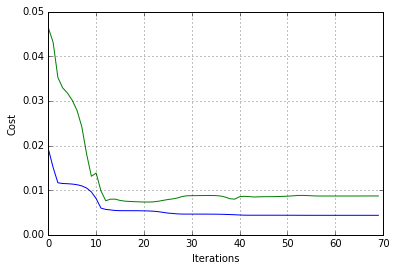

In [135]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Iterations')

In [136]:
NN.forward(testx)

array([[ 0.87952888],
       [ 0.89191937],
       [ 0.91145206],
       [ 0.90277716]])

In [112]:
scalar = 0.3
for i in range(5000):
    djdw1, djdw2 = NN.costfunctionprime(X,y)
    NN.w1 = NN.w1 - scalar*djdw1
    NN.w2 = NN.w2 - scalar*djdw2


In [137]:
from numpy import *
hourssleep = linspace(0,10,100)
hoursstudy = linspace(0,5,100)

hourssleepnorm = hourssleep/10
hoursstudynorm = hoursstudy/5

a,b = meshgrid(hourssleepnorm, hoursstudynorm)

allinputs = np.zeros((a.size, 2))
allinputs[:,0] = a.ravel()
allinputs[:,1] = b.ravel()

In [138]:
alloutputs = NN.forward(allinputs)

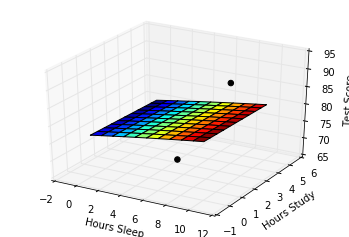

In [141]:
#%matplotlib qt
#%matplotlib inline
from numpy import *
from matplotlib import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

yy = np.dot(hoursstudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hourssleep.reshape(100,1), np.ones((1,100))).T


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)

surf = ax.plot_surface(xx, yy, 100*alloutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

In [126]:
NN = Neural_Network()
X = np.array(([3,5],[5,1],[10,2],[6,1.5]), dtype=float)
y = np.array(([75],[82],[93],[70]), dtype=float)

X = X/np.amax(X, axis=0)
y = y/100

In [10]:
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 145
         Function evaluations: 153
         Gradient evaluations: 153


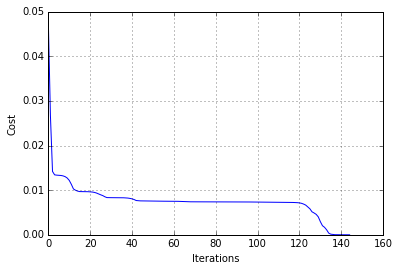

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [129]:
#training data
trainx = np.array(([3,5],[5,1],[10,2],[6,1.5]), dtype=float)
trainy = np.array(([75],[82],[93],[70]), dtype=float)

#testing data
testx = np.array(([4,5.5],[4.5,1],[9,2.5],[6,2]), dtype=float)
testy = np.array(([70],[89],[85],[75]), dtype=float)

#normalize
trainx = trainx/np.amax(trainx, axis=0)
trainy = trainy/100

testx = testx/np.amax(trainx, axis=0)
testy = testy/100